In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os


C:\Users\uma_s\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Finaldimuon.csv')
print(data)

       Unnamed: 0 Type     Run      Event         E1       px1        py1  \
0           11386   GT  146511  267622505    7.53715  -5.18896   1.921050   
1           97339   GT  146510  146339837    8.58507   1.44816  -8.002430   
2           86600   GT  146510  104696928   36.63500  -4.86645  -9.812810   
3           33498   GG  146511  493709438   12.05240  -4.90028  -4.251090   
4           22152   GG  146511  171399555    8.92358  -2.20703  -0.308785   
...           ...  ...     ...        ...        ...       ...        ...   
49917       66318   GT  146514  266116849  117.23500 -36.86280  -2.487730   
49918        7611   GT  146511   33471677  175.29500 -36.97890  40.877500   
49919       38656   GT  146511  332740529  166.51300  11.55530 -32.721200   
49920       42531   GT  146511  164244768  198.33100  54.89460  19.601900   
49921       87389   GT  146510  121218699  102.48000   7.84822 -16.999600   

             pz1       pt1      eta1  ...      eta2      phi2  Q2         M

In [3]:
data.head()

,Unnamed: 0,Type,Run,Event,E1,px1,py1,pz1,pt1,eta1,...,eta2,phi2,Q2,M,Vector px Sum,Vector py Sum,Vector pz Sum,Resultant Momentum Sum,Final Energy,ENERGY LOST
0,11386,GT,146511,267622505,7.53715,-5.18896,1.921050,5.11681,5.53315,0.827155,...,1.754790,-2.184080,-1,4.22848,-5.957816,0.828640,8.86339,10.711764,11.51616,1.580000e-10
1,97339,GT,146510,146339837,8.58507,1.44816,-8.002430,2.74887,8.13241,0.331887,...,0.797469,-1.357460,-1,3.63056,2.989450,-15.117110,9.18942,17.941830,18.30547,4.450000e-10
2,86600,GT,146510,104696928,36.63500,-4.86645,-9.812810,-34.95910,10.95320,-1.877380,...,-2.349540,-2.598880,-1,2.52726,-5.775715,-10.361213,-40.47290,42.175458,42.25111,1.440000e-09
3,33498,GG,146511,493709438,12.05240,-4.90028,-4.251090,10.15700,6.48726,1.230660,...,1.242620,-1.151140,-1,6.93281,-2.774610,-9.015390,18.44170,20.714054,21.84344,3.280000e-09
4,22152,GG,146511,171399555,8.92358,-2.20703,-0.308785,8.64019,2.22852,2.064460,...,0.684614,0.256866,-1,11.84460,7.591400,2.264955,16.13051,17.970886,21.52318,4.190000e-09


In [4]:
data.isnull().sum()

Unnamed: 0                0
Type                      0
Run                       0
Event                     0
E1                        0
px1                       0
py1                       0
pz1                       0
pt1                       0
eta1                      0
phi1                      0
Q1                        0
E2                        0
px2                       0
py2                       0
pz2                       0
pt2                       0
eta2                      0
phi2                      0
Q2                        0
M                         0
Vector px Sum             0
Vector py Sum             0
Vector pz Sum             0
Resultant Momentum Sum    0
Final Energy              0
ENERGY LOST               0
dtype: int64

In [5]:
data['M'] = data['M'].fillna(data['M'].median())

In [6]:
data.describe()

,Unnamed: 0,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,...,eta2,phi2,Q2,M,Vector px Sum,Vector py Sum,Vector pz Sum,Resultant Momentum Sum,Final Energy,ENERGY LOST
count,49922.000000,49922.000000,4.992200e+04,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,...,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,49922.000000,4.992200e+04
mean,49924.494932,146511.991106,2.594712e+08,18.322513,0.004855,-0.357363,-0.666884,7.996099,-0.087825,-0.035022,...,0.063402,0.020228,0.002644,9.726383,0.040404,-0.070114,-0.129050,22.487209,26.735010,2.908174e-05
std,28901.724328,1.601466,1.569805e+08,16.135048,6.709285,7.359713,22.277707,5.947165,1.489650,1.806421,...,1.518990,1.811447,1.000007,10.547519,7.892642,8.273892,27.965664,20.178403,20.098063,3.493526e-05
min,0.000000,146510.000000,6.435000e+03,2.697580,-123.372000,-174.603000,-623.037000,1.000590,-2.809610,-3.141400,...,-2.499470,-3.141570,-1.000000,2.000040,-169.956740,-302.774100,-626.540570,0.016004,6.833410,1.580000e-10
25%,25004.250000,146511.000000,1.283009e+08,8.906752,-3.872905,-4.118175,-11.409125,4.393293,-1.493660,-1.600595,...,-1.450285,-1.540325,-1.000000,3.098220,-4.660452,-4.808305,-14.904725,11.165545,15.760287,7.110000e-06
50%,49831.000000,146511.000000,2.457904e+08,13.420700,0.065594,-0.178090,-1.375665,6.616850,-0.158931,-0.063631,...,0.114180,0.028323,1.000000,6.966025,0.068417,-0.006341,-0.144800,17.611802,21.504105,2.160000e-05
75%,75014.500000,146514.000000,3.920290e+08,22.822500,3.922685,3.810590,10.107125,9.882710,1.374278,1.511658,...,1.530818,1.596788,1.000000,12.536900,4.765335,4.706373,14.377937,28.705625,31.737814,4.220000e-05
max,99999.000000,146514.000000,5.674745e+08,641.101000,76.430000,131.689000,447.002000,179.954000,2.684010,3.141500,...,2.613420,3.141580,1.000000,109.722000,133.492700,432.582900,968.426900,1016.132429,1016.219568,9.178740e-04


<AxesSubplot:>

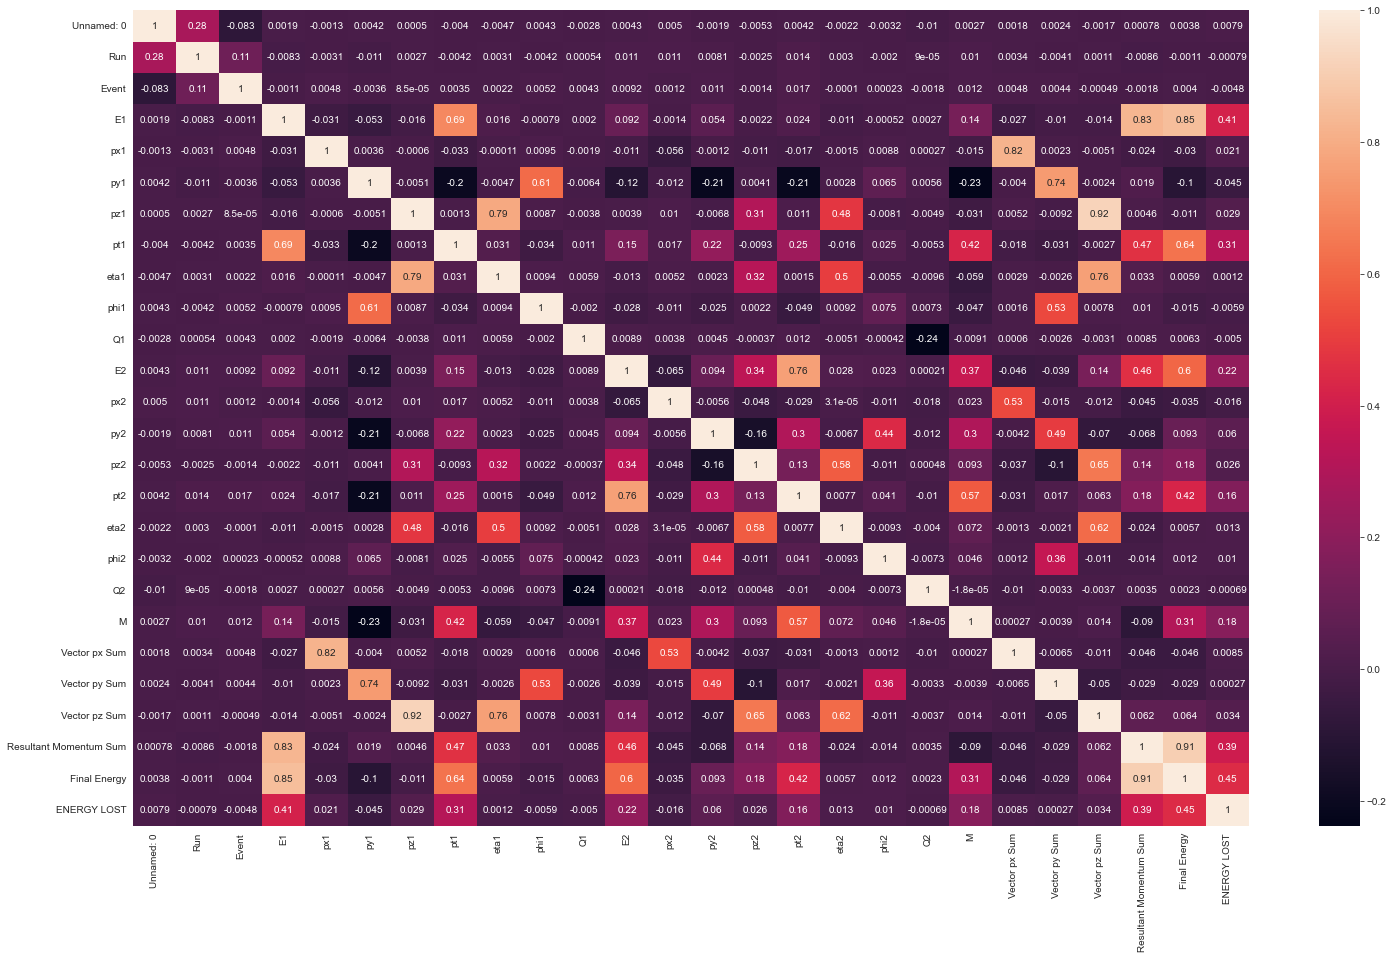

In [7]:
plt.figure(figsize = (25,15))
sb.heatmap(data.corr(),annot = True)

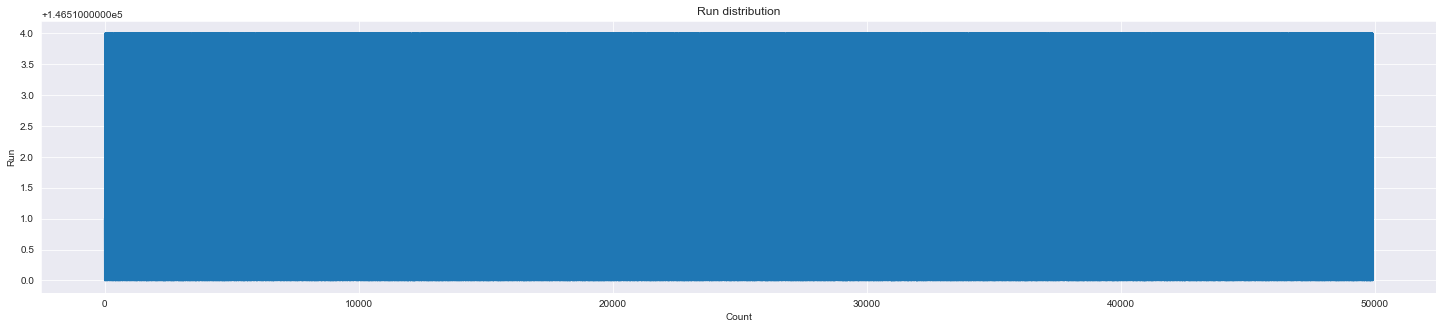

In [8]:
plt.figure(figsize = (25,5))
plt.plot(data['Run'])
plt.xlabel('Count')
plt.ylabel('Run')
plt.title('Run distribution')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'M vs Run')

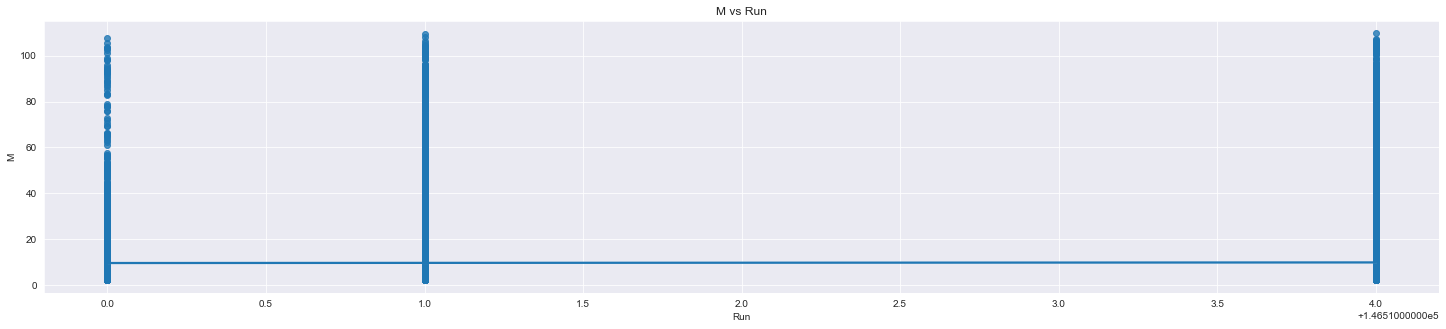

In [9]:
plt.figure(figsize = (25,5))
sb.regplot(data['Run'],data['M'])
plt.title('M vs Run')

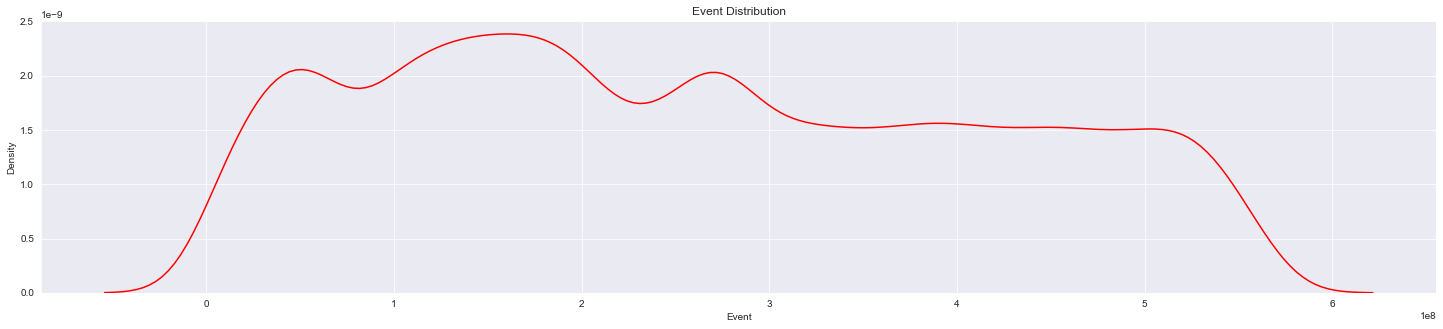

In [10]:
plt.figure(figsize = (25,5))
sb.kdeplot(data['Event'],color = 'red');
plt.title('Event Distribution');

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Event', ylabel='M'>

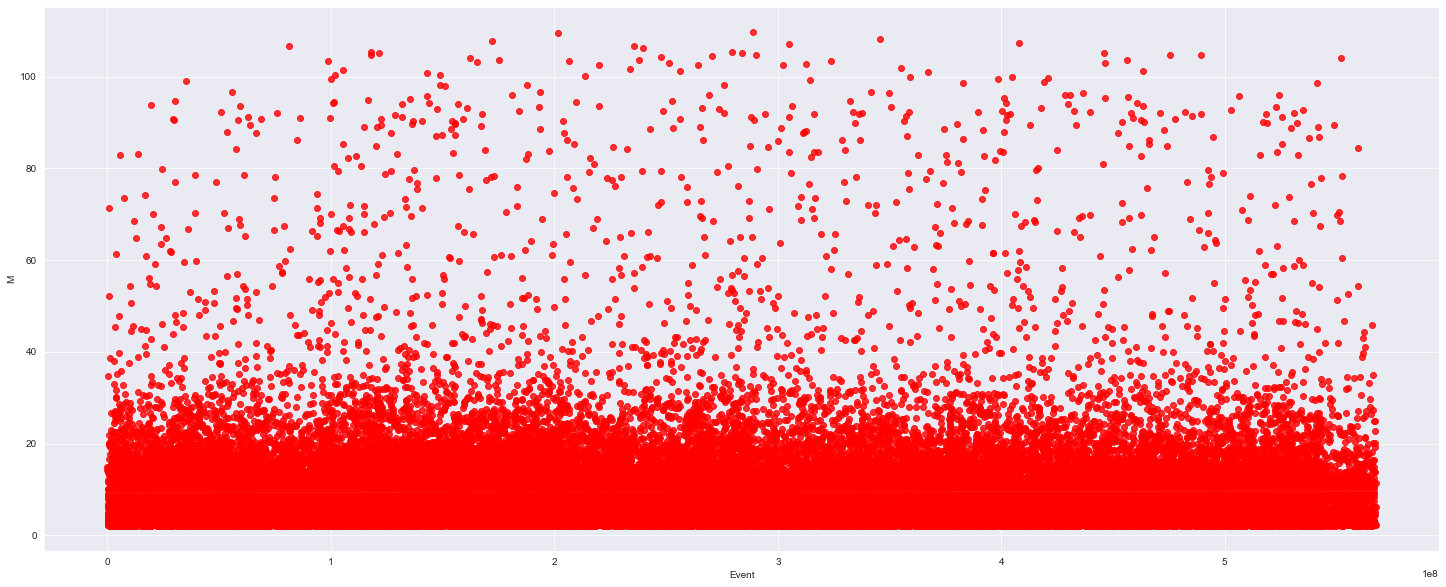

In [11]:
plt.figure(figsize = (25,10))
sb.regplot(data['Event'],data['M'],color = 'red')

Text(0.5, 0, 'E1,E2')

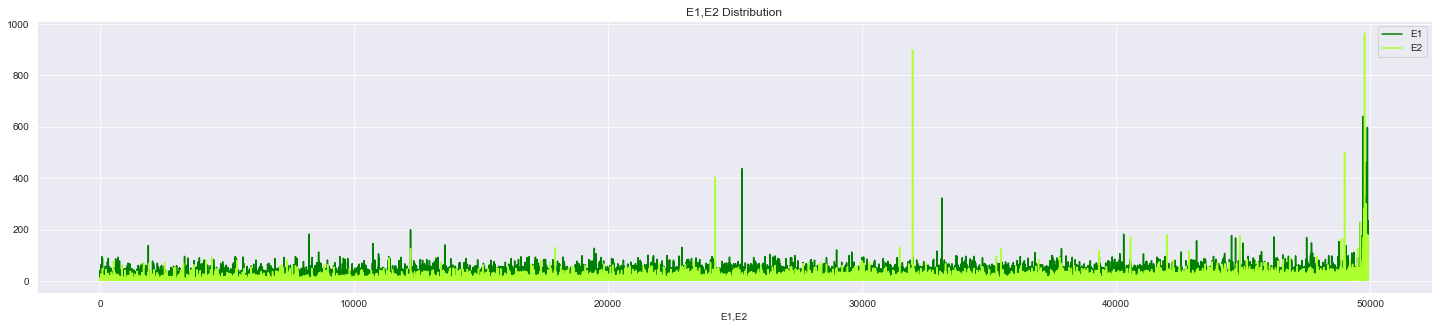

In [12]:
plt.figure(figsize = (25,5))
plt.plot(data['E1'],color = 'green',label = 'E1')
plt.plot(data['E2'],color = 'greenyellow',label = 'E2')
plt.legend()
plt.title('E1,E2 Distribution')
plt.xlabel('E1,E2')

<function matplotlib.pyplot.legend(*args, **kwargs)>

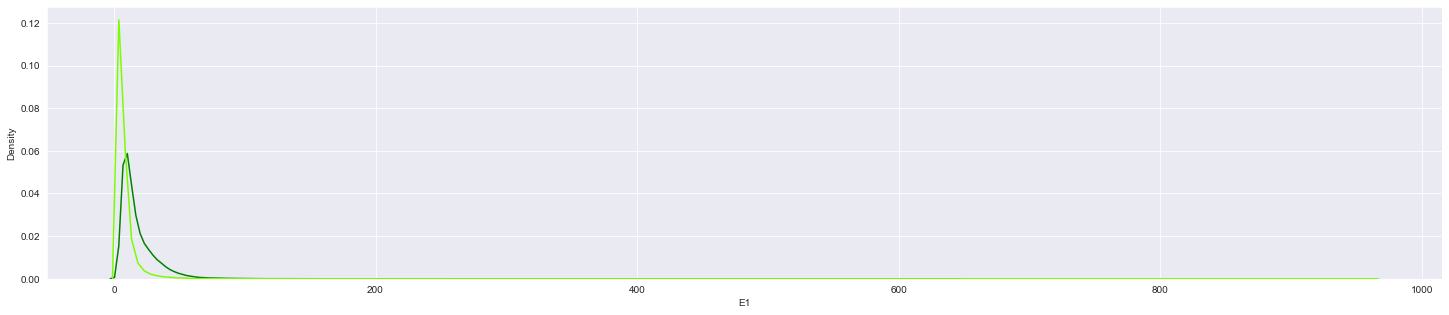

In [13]:
plt.figure(figsize = (25,5))
sb.kdeplot(data['E1'],color = 'green',label = 'E1')
sb.kdeplot(data['E2'],color = 'lawngreen',label = 'E2')
plt.legend


C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


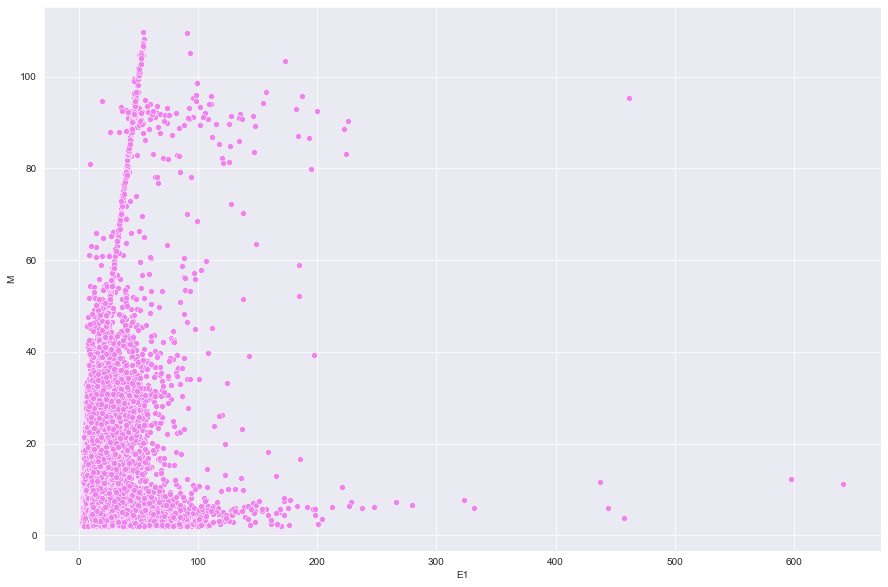

In [14]:
plt.figure(figsize = (15,10))
sb.scatterplot(data['E1'],data['M'],color = 'violet')
plt.savefig('Fig 5.png')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


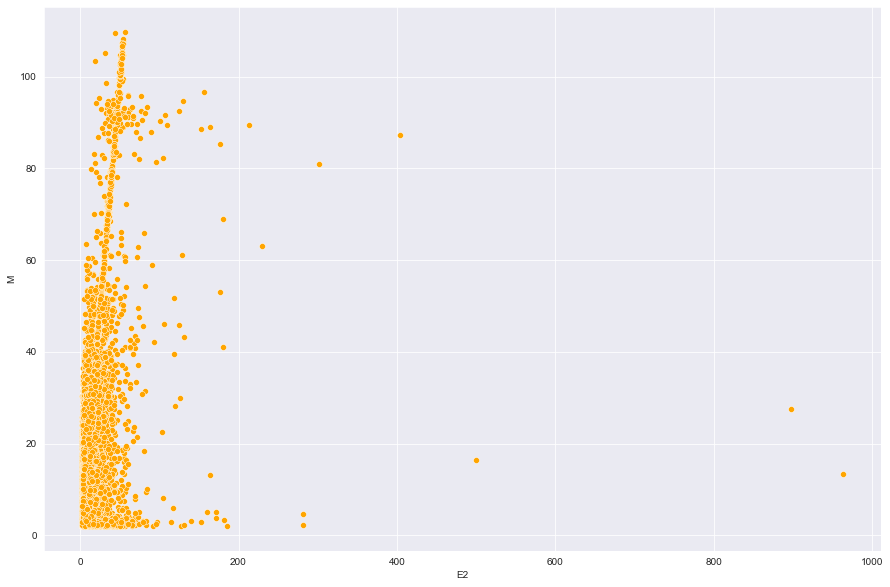

In [15]:
plt.figure(figsize = (15,10))
sb.scatterplot(data['E2'],data['M'],color = 'orange')
plt.savefig('Fig 4')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'E1 vs E2')

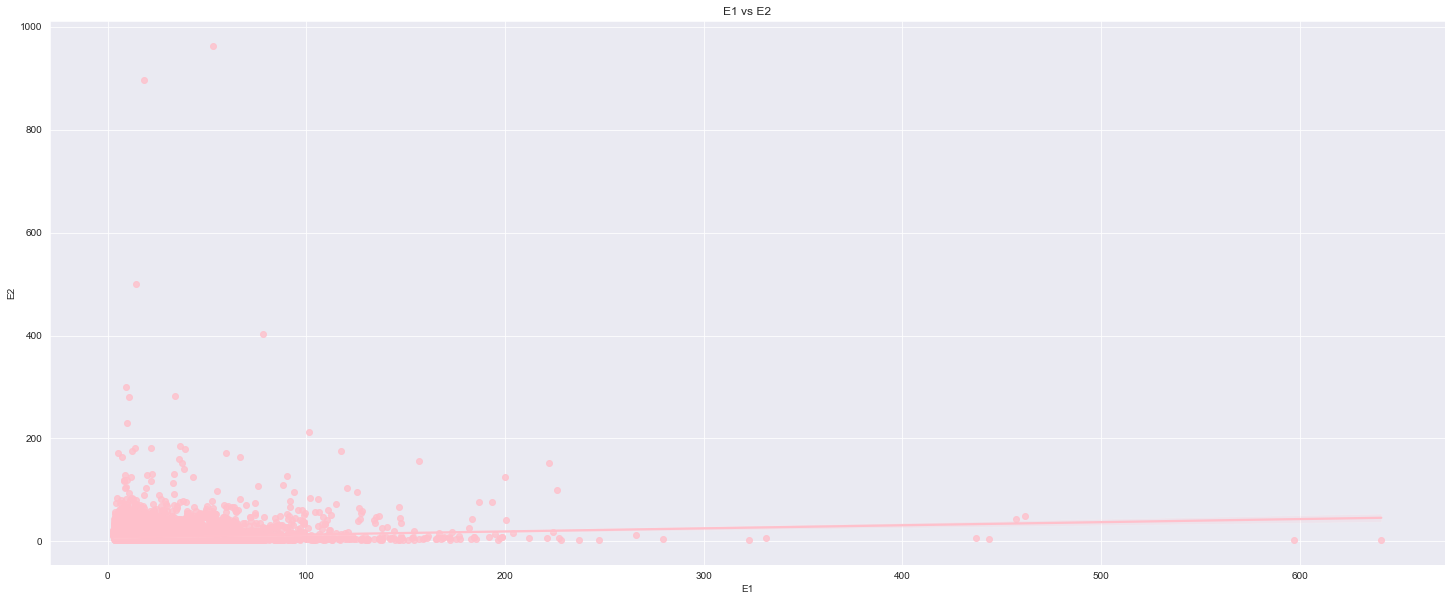

In [16]:
plt.figure(figsize = (25,10))
sb.regplot(data['E1'],data['E2'],color = 'pink')
plt.title('E1 vs E2')

Text(0.5, 1.0, 'pz2')

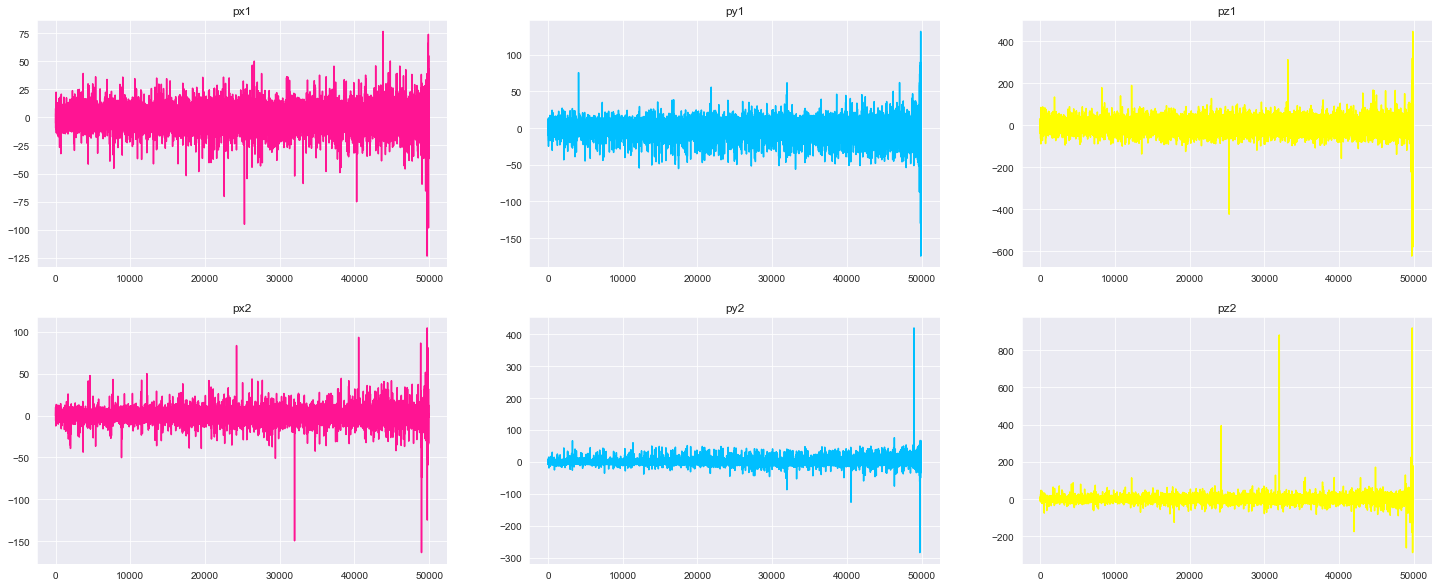

In [17]:
fig,ax = plt.subplots(2,3,figsize = (25,10))
ax[0][0].plot(data['px1'],color = 'deeppink')
ax[0][0].set_title('px1')
ax[0][1].plot(data['py1'],color = 'deepskyblue')
ax[0][1].set_title('py1')
ax[0][2].plot(data['pz1'],color = 'yellow')
ax[0][2].set_title('pz1')
ax[1][0].plot(data['px2'],color = 'deeppink')
ax[1][0].set_title('px2')
ax[1][1].plot(data['py2'],color = 'deepskyblue')
ax[1][1].set_title('py2')
ax[1][2].plot(data['pz2'],color = 'yellow')
ax[1][2].set_title('pz2')

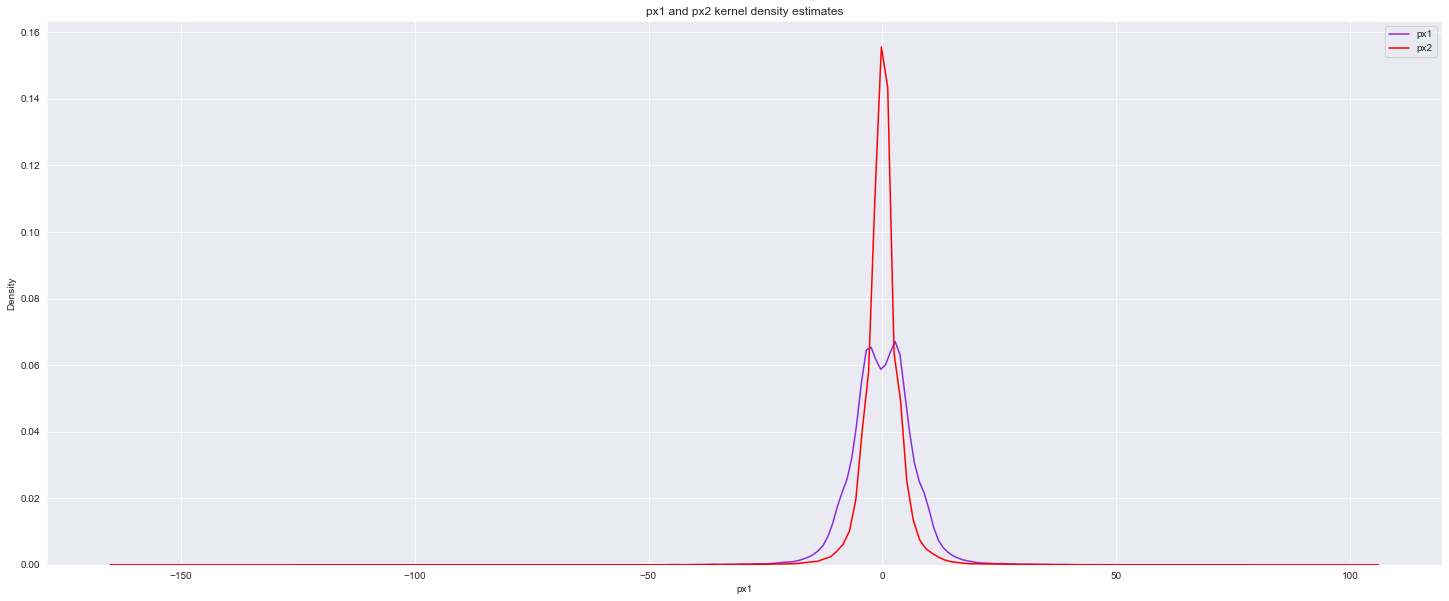

In [18]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['px1'],color = 'blueviolet',label = 'px1');
sb.kdeplot(data['px2'],color = 'red',label = 'px2');
plt.legend();
plt.title('px1 and px2 kernel density estimates');

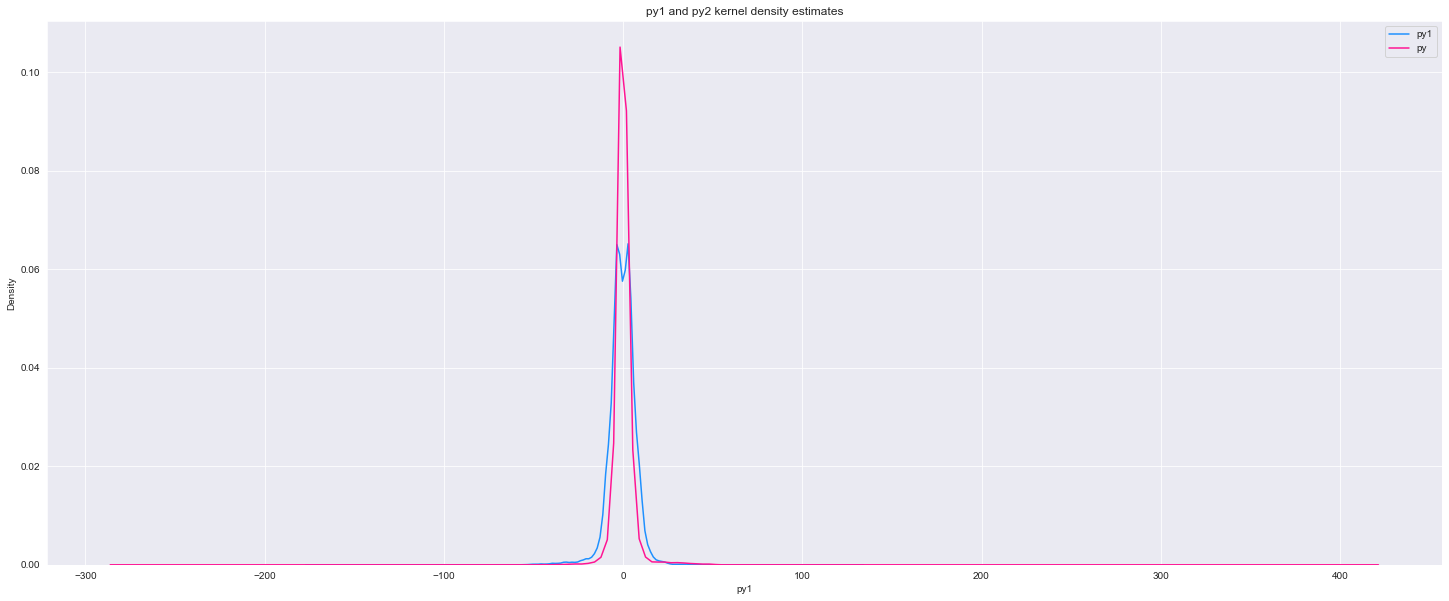

In [19]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['py1'],color = 'dodgerblue',label = 'py1');
sb.kdeplot(data['py2'],color = 'deeppink',label = 'py');
plt.legend();
plt.title('py1 and py2 kernel density estimates');

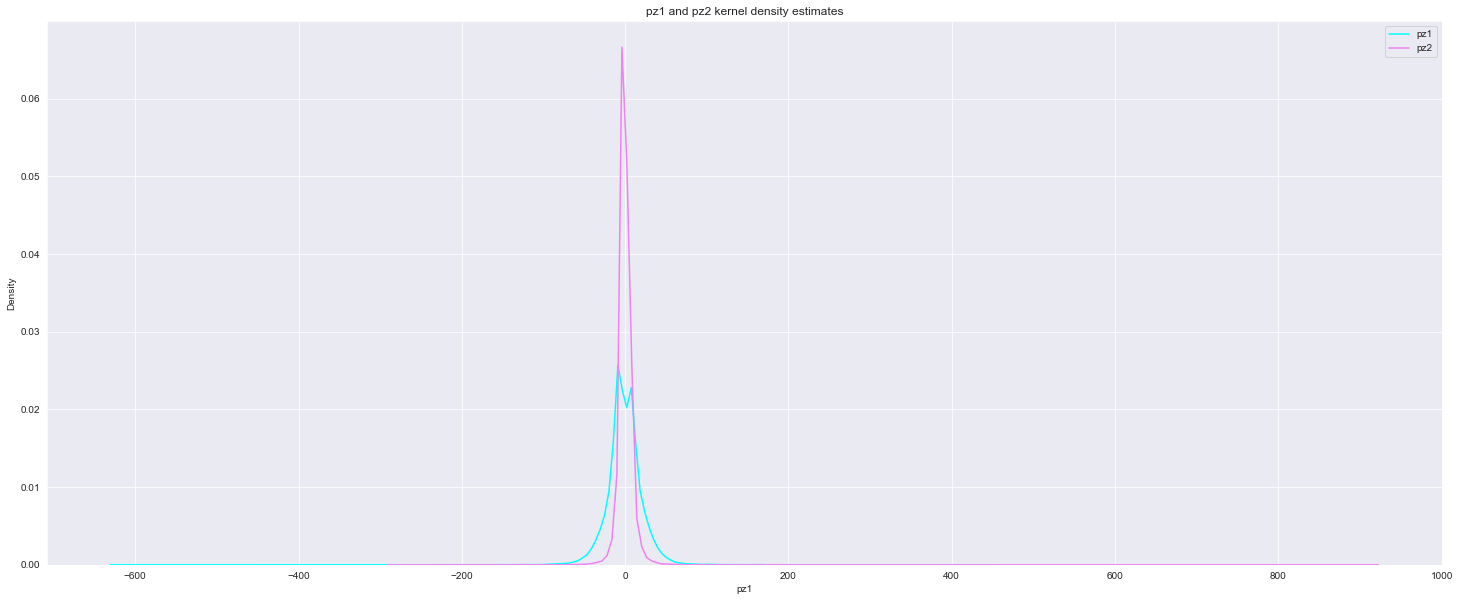

In [20]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['pz1'],color = 'aqua',label = 'pz1');
sb.kdeplot(data['pz2'],color = 'violet',label = 'pz2');
plt.legend();
plt.title('pz1 and pz2 kernel density estimates');

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


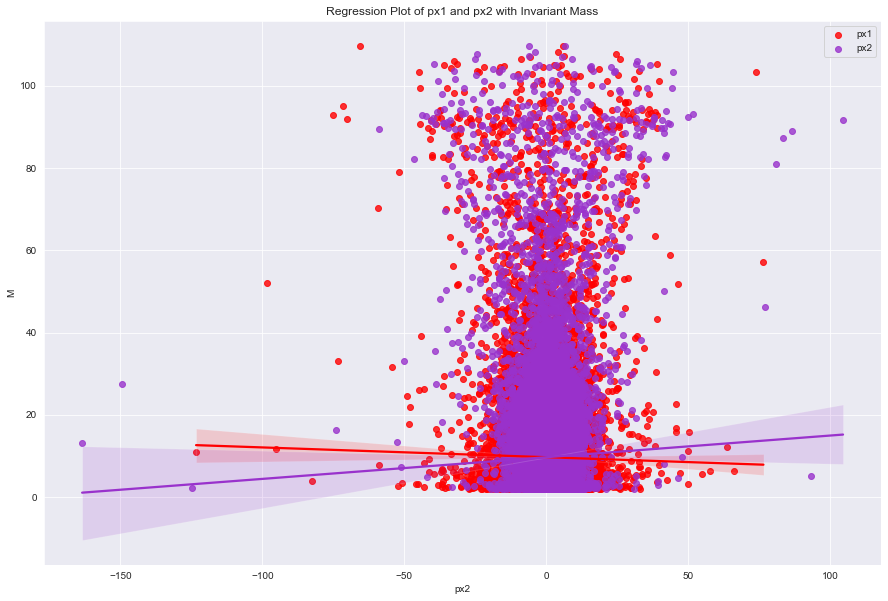

In [21]:
plt.figure(figsize = (15,10))
sb.regplot(data['px1'],data['M'],color = 'red',label = 'px1')
sb.regplot(data['px2'],data['M'],color = 'darkorchid',label = 'px2')
plt.legend()
plt.title('Regression Plot of px1 and px2 with Invariant Mass')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


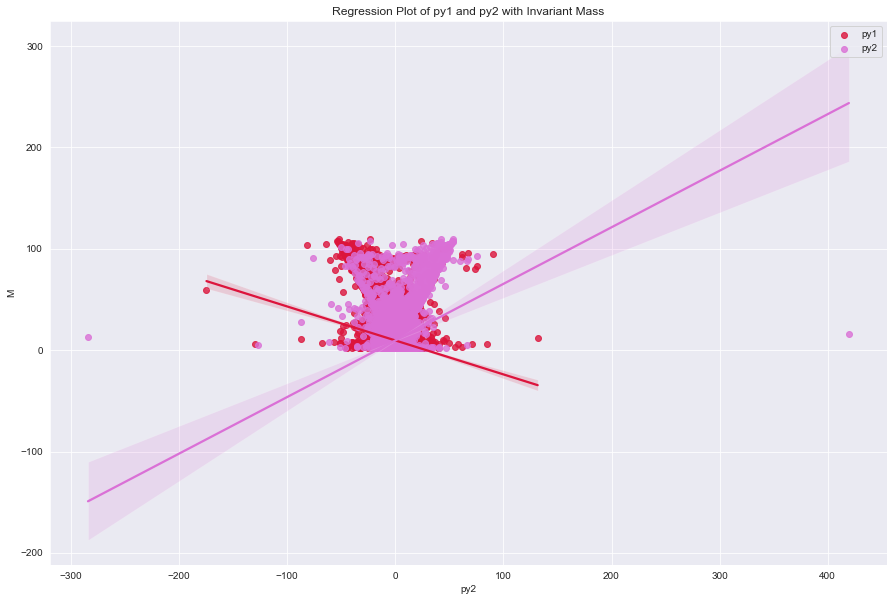

In [22]:
plt.figure(figsize = (15,10))
sb.regplot(data['py1'],data['M'],color = 'crimson',label = 'py1')
sb.regplot(data['py2'],data['M'],color = 'orchid',label = 'py2')
plt.legend()
plt.title('Regression Plot of py1 and py2 with Invariant Mass')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


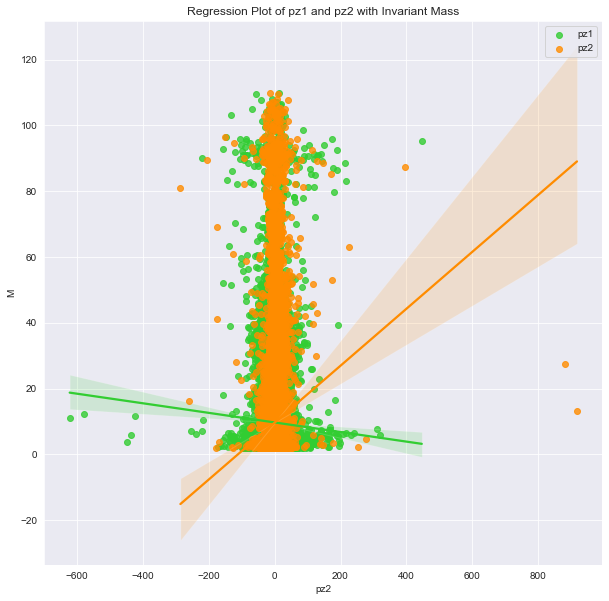

In [23]:
plt.figure(figsize = (10,10))
sb.regplot(data['pz1'],data['M'],color = 'limegreen',label = 'pz1')
sb.regplot(data['pz2'],data['M'],color = 'darkorange',label = 'pz2')
plt.legend()
plt.title('Regression Plot of pz1 and pz2 with Invariant Mass')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


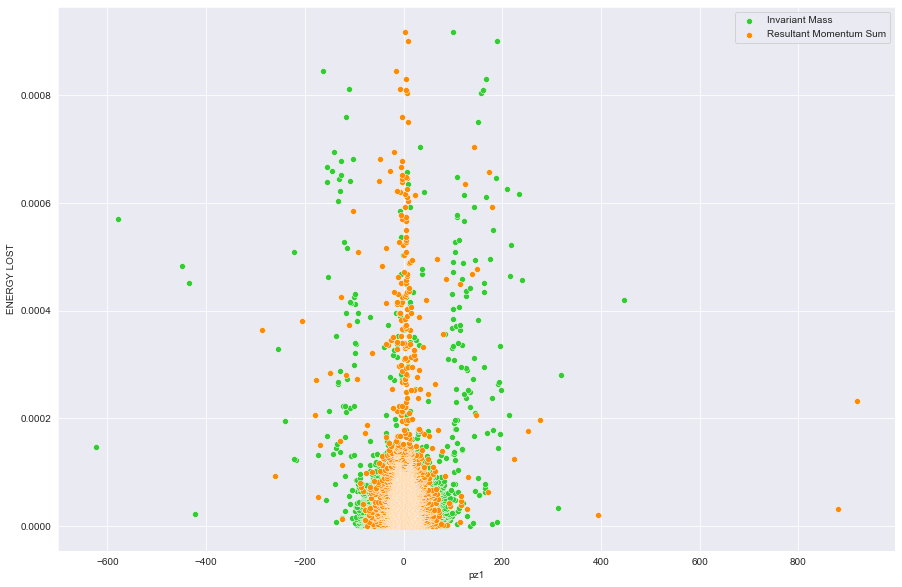

In [24]:
plt.figure(figsize = (15,10))
sb.scatterplot(data['pz1'],data['ENERGY LOST'],color = 'limegreen',label = 'Invariant Mass')
sb.scatterplot(data['pz2'],data['ENERGY LOST'],color = 'darkorange',label = 'Resultant Momentum Sum')
plt.legend()
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


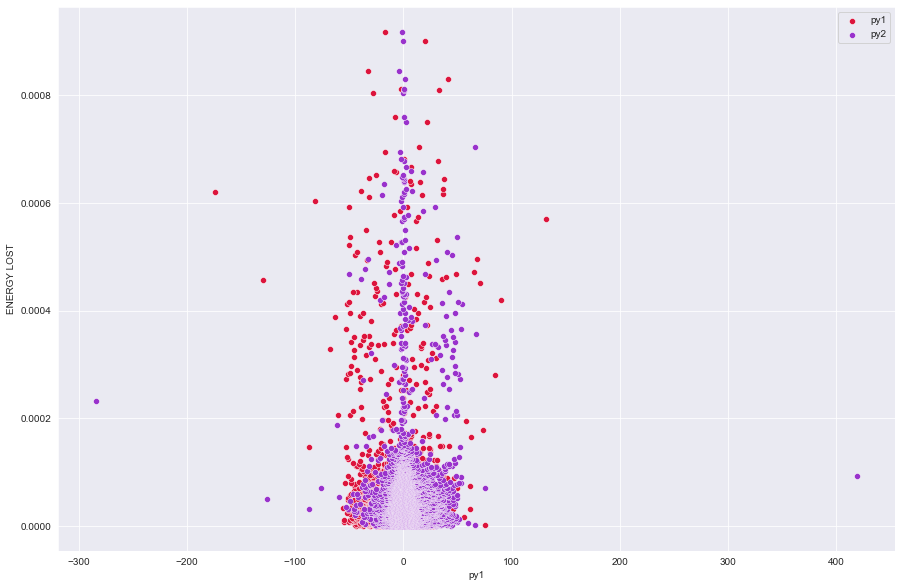

In [25]:
plt.figure(figsize = (15,10))
sb.scatterplot(data['py1'],data['ENERGY LOST'],color = 'crimson',label = 'py1')
sb.scatterplot(data['py2'],data['ENERGY LOST'],color = 'darkorchid',label = 'py2')
plt.legend()
plt.show()



C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


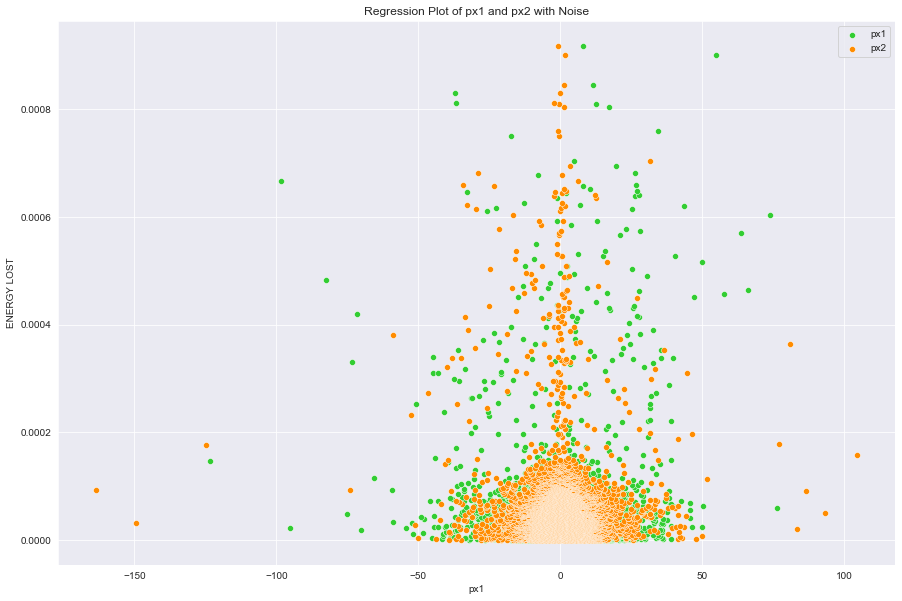

In [26]:
plt.figure(figsize = (15,10))
sb.scatterplot(data['px1'],data['ENERGY LOST'],color = 'limegreen',label = 'px1')
sb.scatterplot(data['px2'],data['ENERGY LOST'],color = 'darkorange',label = 'px2')
plt.legend()
plt.title('Regression Plot of px1 and px2 with Noise')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


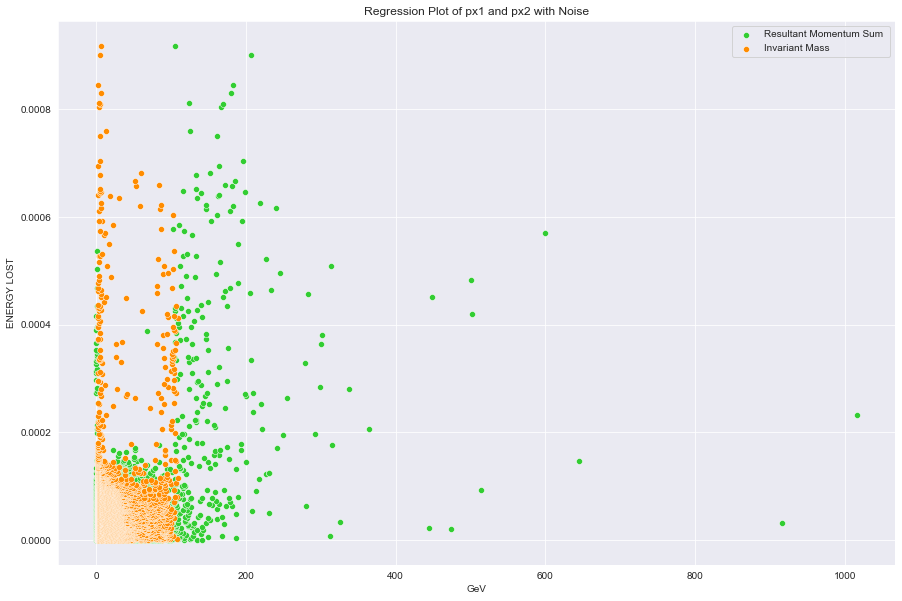

<Figure size 432x288 with 0 Axes>

In [27]:

plt.figure(figsize = (15,10))
sb.scatterplot(data['Resultant Momentum Sum'],data['ENERGY LOST'],color = 'limegreen',label = 'Resultant Momentum Sum ')
sb.scatterplot(data['M'],data['ENERGY LOST'],color = 'darkorange',label = 'Invariant Mass')
# Set label for x-axis
plt.xlabel('GeV')
  

plt.legend()
plt.title('Regression Plot of px1 and px2 with Noise')
plt.show()
plt.savefig('Fig2')

Text(0.5, 1.0, 'eta1 and eta2 distribution')

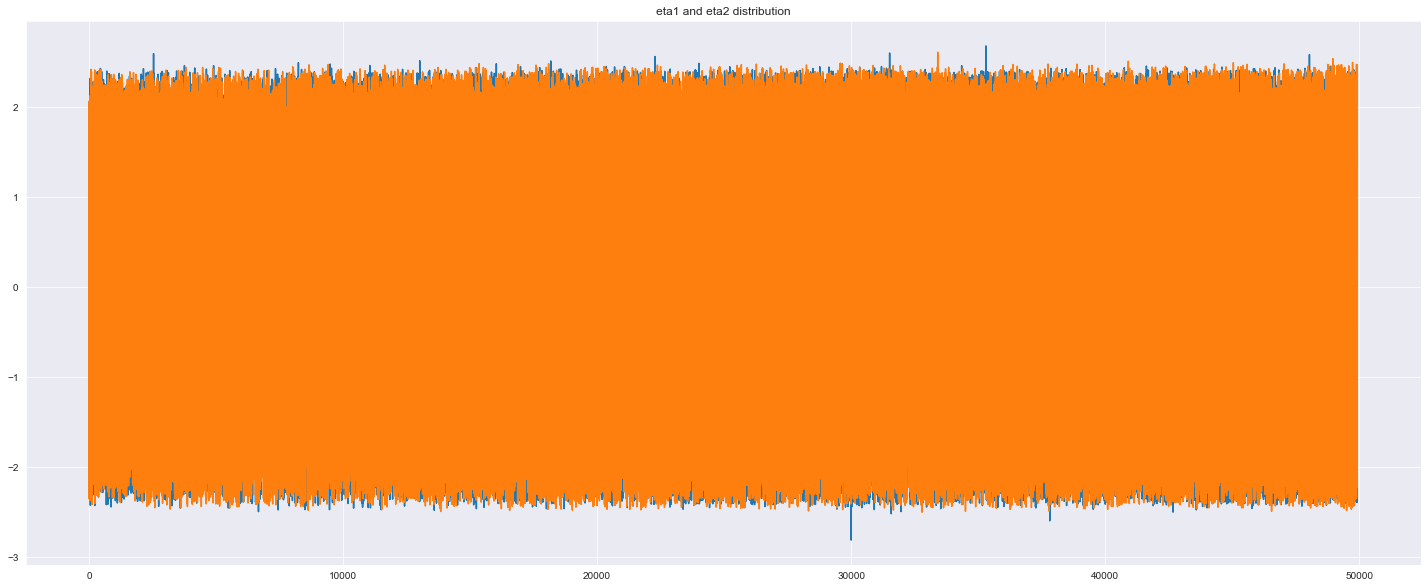

In [28]:
plt.figure(figsize = (25,10))
plt.plot(data['eta1'])
plt.plot(data['eta2'])
plt.title('eta1 and eta2 distribution')

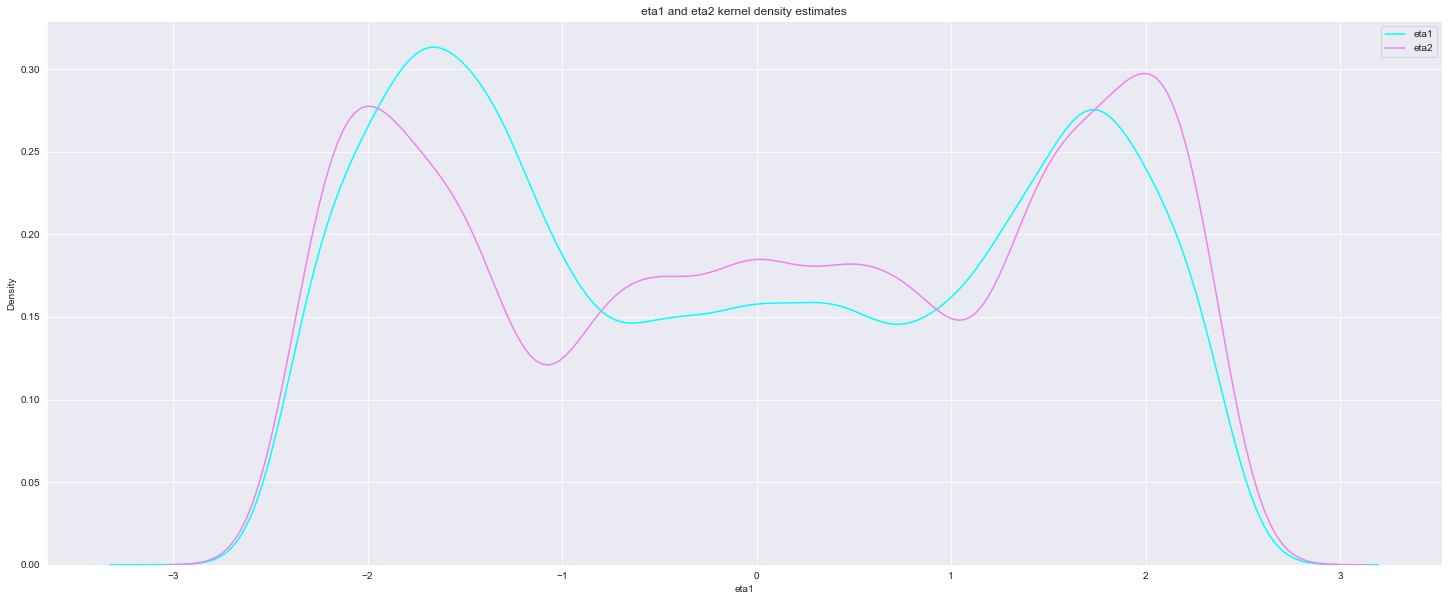

In [29]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['eta1'],color = 'aqua',label = 'eta1');
sb.kdeplot(data['eta2'],color = 'violet',label = 'eta2');
plt.legend();
plt.title('eta1 and eta2 kernel density estimates');

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


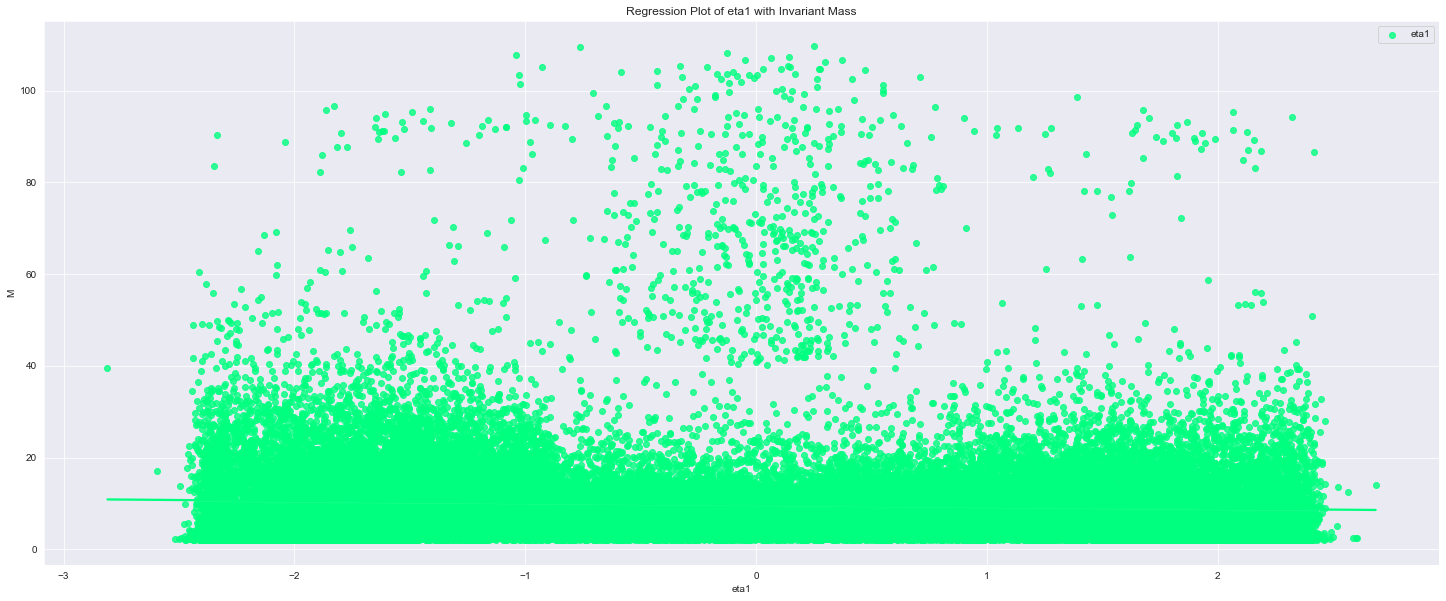

In [30]:
plt.figure(figsize = (25,10))
sb.regplot(data['eta1'],data['M'],color = 'springgreen',label = 'eta1')
plt.legend()
plt.title('Regression Plot of eta1 with Invariant Mass')
plt.show()

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eta2', ylabel='M'>

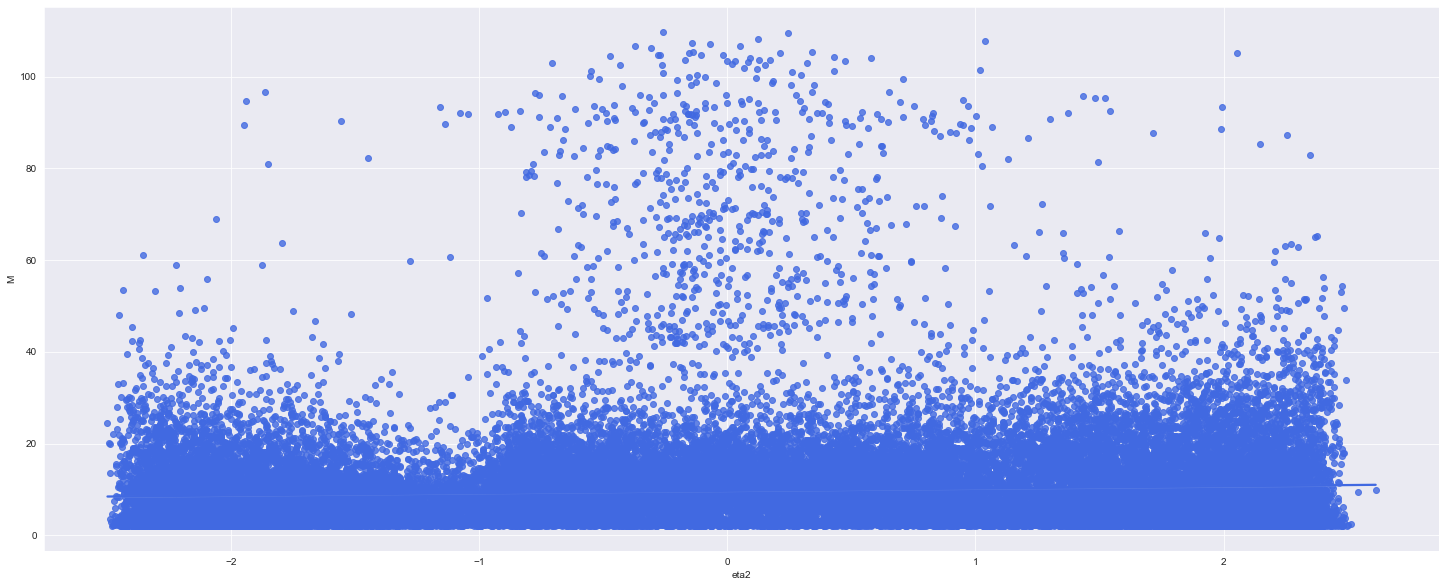

In [31]:
plt.figure(figsize = (25,10))
sb.regplot(data['eta2'],data['M'],color = 'royalblue',label = 'eta2')

Text(0.5, 1.0, 'Phi Distribution')

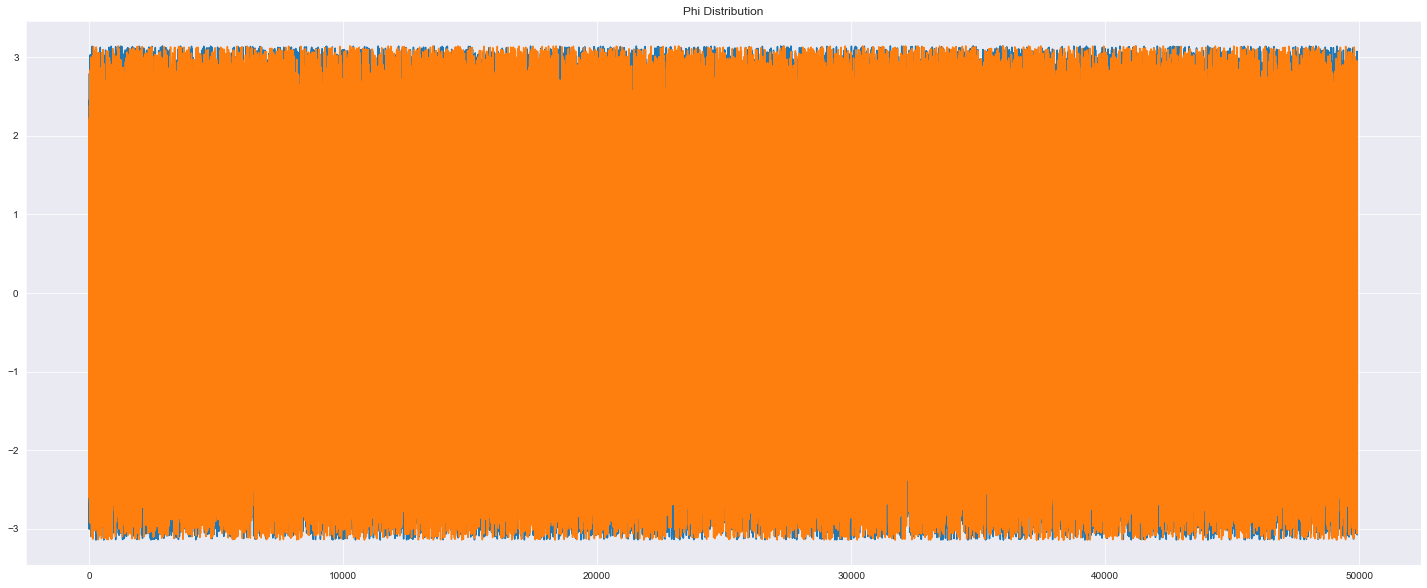

In [32]:
plt.figure(figsize = (25,10))
plt.plot(data['phi1'])
plt.plot(data['phi2'])
plt.title('Phi Distribution')

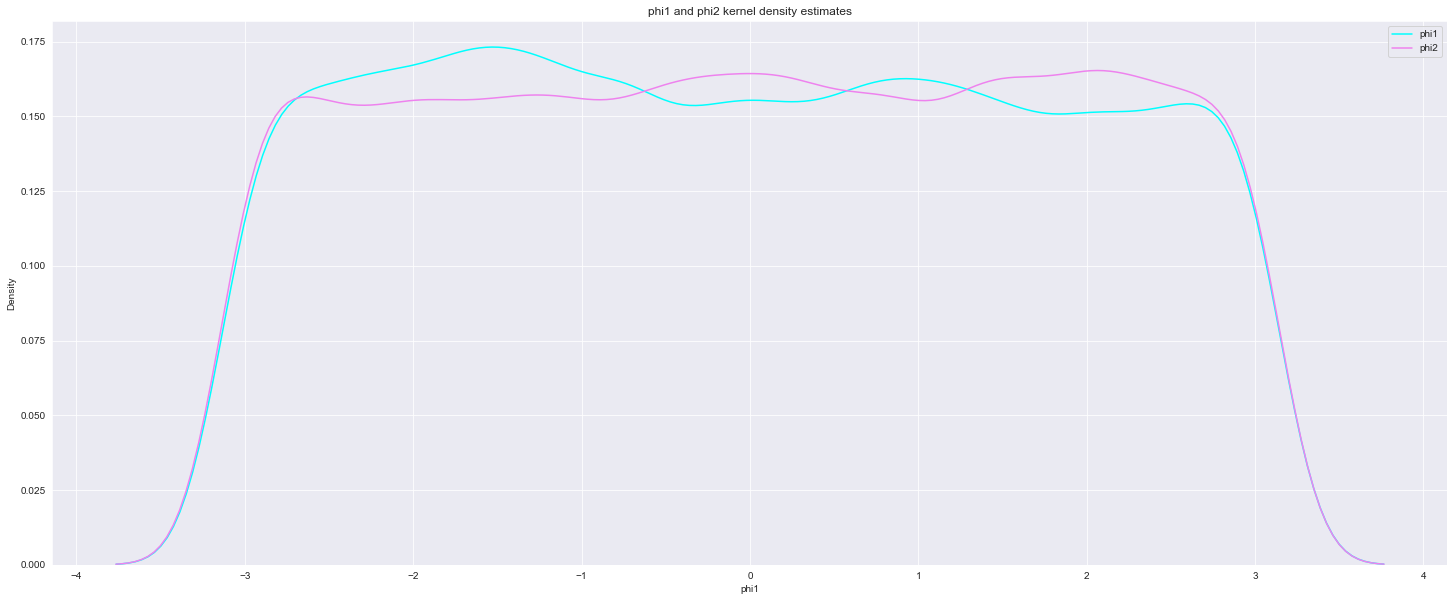

In [33]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['phi1'],color = 'aqua',label = 'phi1');
sb.kdeplot(data['phi2'],color = 'violet',label = 'phi2');
plt.legend();
plt.title('phi1 and phi2 kernel density estimates');


C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


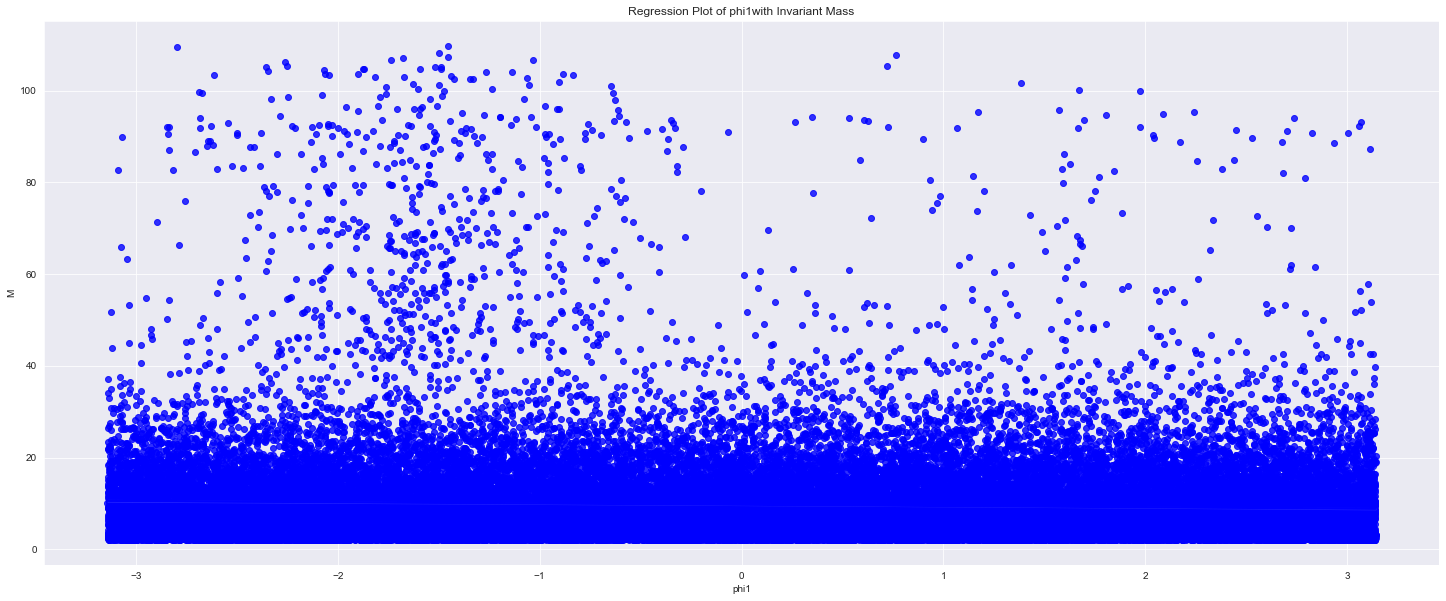

In [34]:
plt.figure(figsize = (25,10))
sb.regplot(data['phi1'],data['M'],color = 'blue',label = 'phi1')
plt.title('Regression Plot of phi1with Invariant Mass')
plt.show()


C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


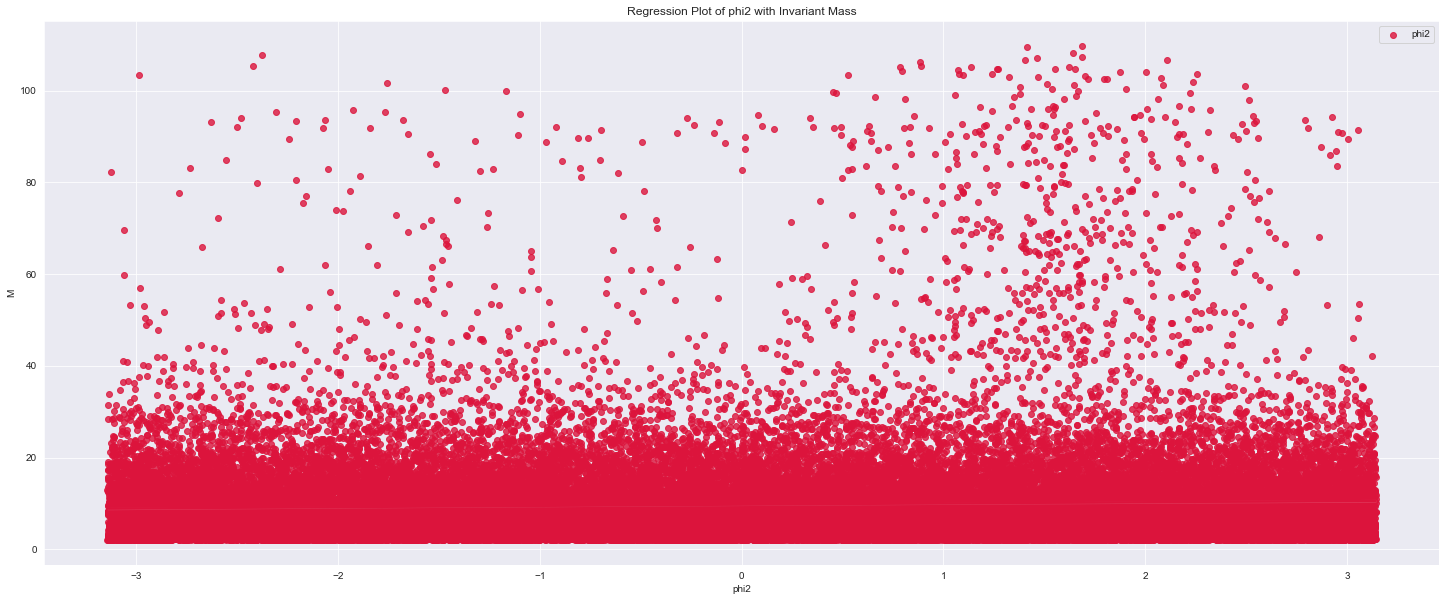

In [35]:
plt.figure(figsize = (25,10))
sb.regplot(data['phi2'],data['M'],color = 'crimson',label = 'phi2')
plt.legend()
plt.title('Regression Plot of phi2 with Invariant Mass')
plt.show()

<AxesSubplot:xlabel='Q1', ylabel='Density'>

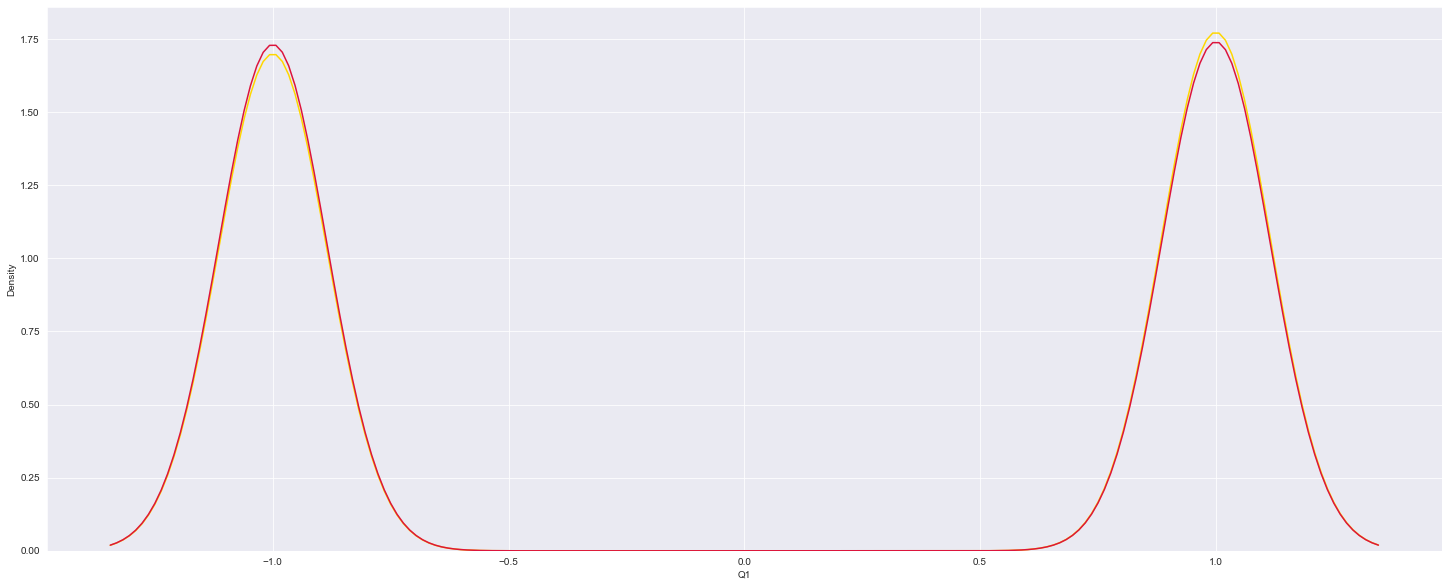

In [36]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['Q1'],color = 'gold')
sb.kdeplot(data['Q2'],color = 'crimson')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


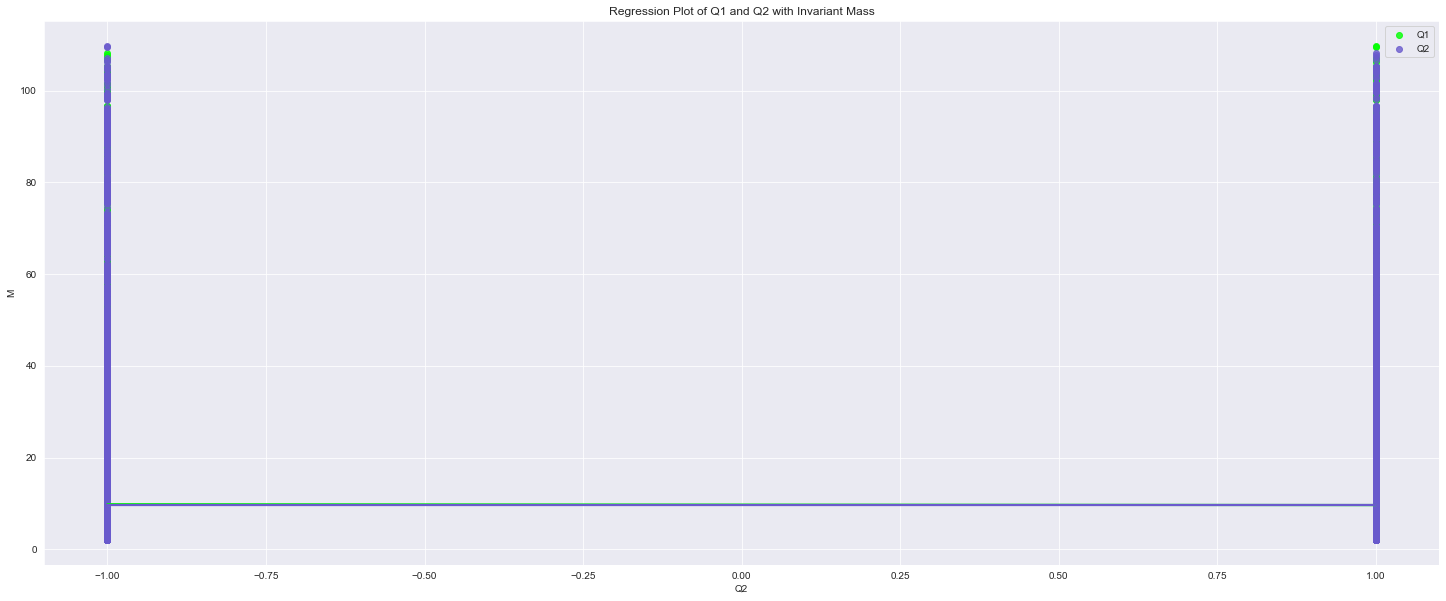

In [37]:
plt.figure(figsize = (25,10))
sb.regplot(data['Q1'],data['M'],color = 'lime',label = 'Q1')
sb.regplot(data['Q2'],data['M'],color = 'slateblue',label = 'Q2')
plt.legend()
plt.title('Regression Plot of Q1 and Q2 with Invariant Mass')
plt.show()

In [ ]:
#Fig 4
plt.figure(figsize = (15,10))
sb.scatterplot(data['E1'],data['M'],color = 'violet')